In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import optuna

pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')

In [4]:
df = pd.read_csv('data/schizophrenia_dataset.csv')
df

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,72,0,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,9997,27,0,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,9998,31,1,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,9999,56,1,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2


In [5]:
df.rename(columns={"Hasta_ID":"Patient ID", "Yaş":"Age", 
                   "Cinsiyet":"Gender", "Eğitim_Seviyesi":"Education Level", "Medeni_Durum": "Marital Statuts",
                     "Meslek":"Occupation", "Gelir_Düzeyi":"Income Level", "Yaşadığı_Yer":"Live Area", 
                     "Tanı":"Diagnosis", "Hastalık_Süresi":"Disease Duration", "Hastaneye_Yatış_Sayısı":"Hospitalizations", 
                     "Ailede_Şizofreni_Öyküsü":"Family History", "Madde_Kullanımı":"Substance Use", 
                     "İntihar_Girişimi":"Suicide Attempt", "Pozitif_Semptom_Skoru":"Positive Symptom Score", "Negatif_Semptom_Skoru":"Negative Symptom Score", 
                     "GAF_Skoru":"GAF Score", "Sosyal_Destek":"Social Support",  "Stres_Faktörleri":"Stress Factors",  "İlaç_Uyumu":"Medication Adherence"}, inplace=True)
df

,Patient ID,Age,Gender,Education Level,Marital Statuts,Occupation,Income Level,Live Area,Diagnosis,Disease Duration,Hospitalizations,Family History,Substance Use,Suicide Attempt,Positive Symptom Score,Negative Symptom Score,GAF Score,Social Support,Stress Factors,Medication Adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,72,0,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,9997,27,0,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,9998,31,1,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,9999,56,1,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2


In [6]:
cat_cols = ["Gender","Education Level", "Marital Statuts" , "Live Area", "Family History", "Substance Use", "Suicide Attempt", "Social Support", "Stress Factors", "Medication Adherence", "Income Level", "Occupation"]
y = df["Diagnosis"]
X = df.drop(columns="Diagnosis")
num_cols = list(set(X.columns) - set(cat_cols))


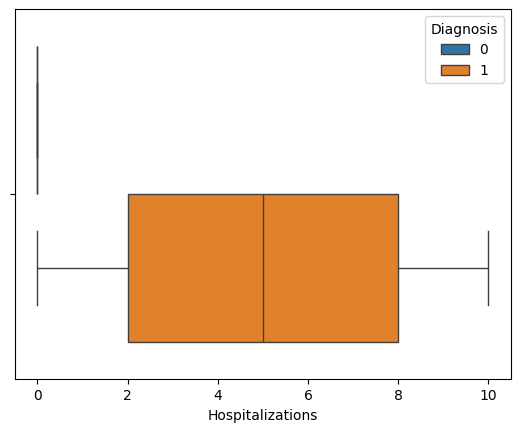

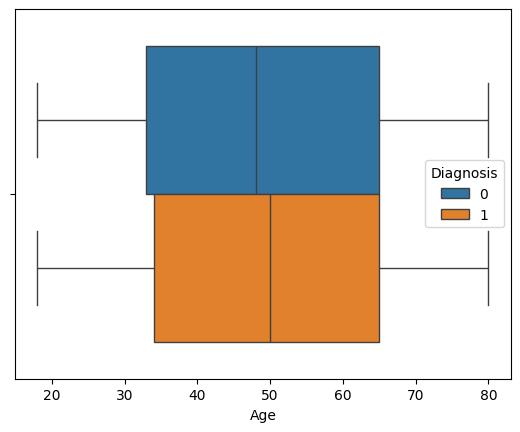

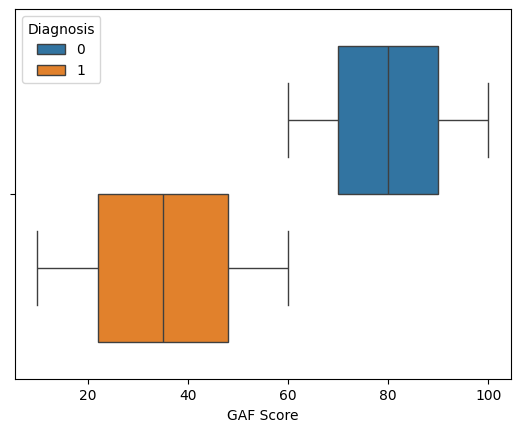

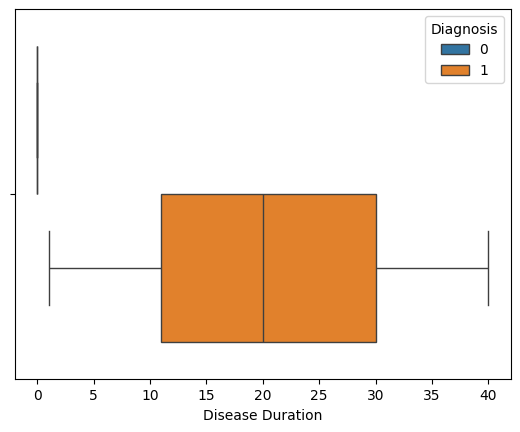

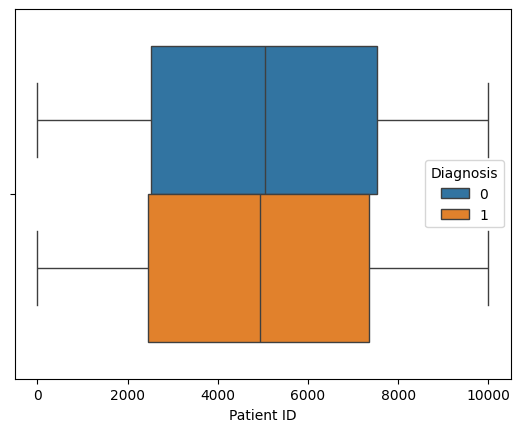

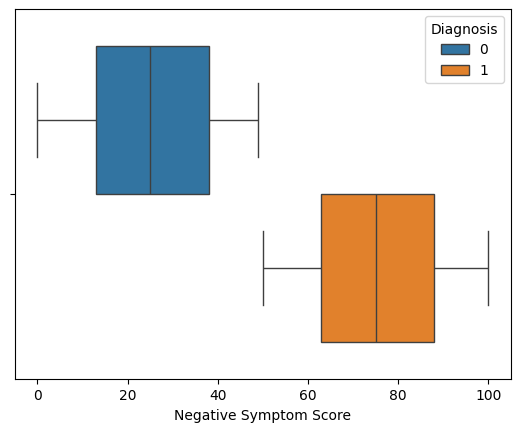

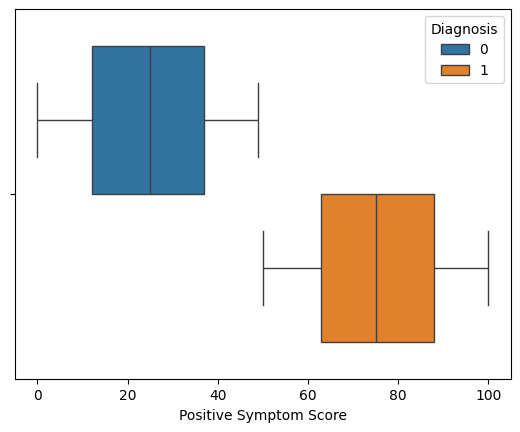

In [7]:
for col in num_cols:
    sns.boxplot(x=X[col], hue=y)
    plt.show()

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


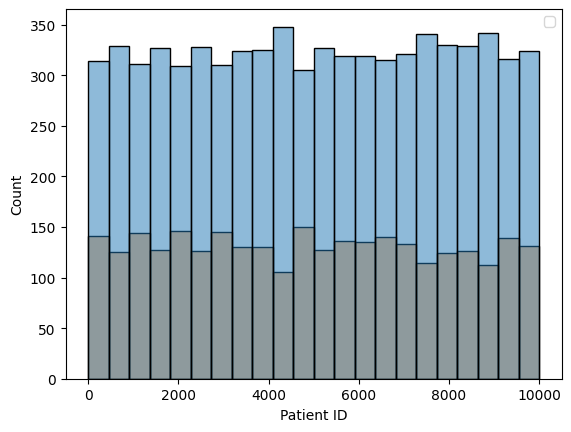

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


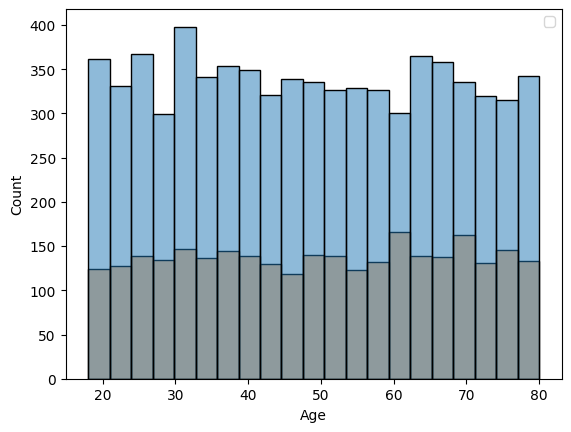

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


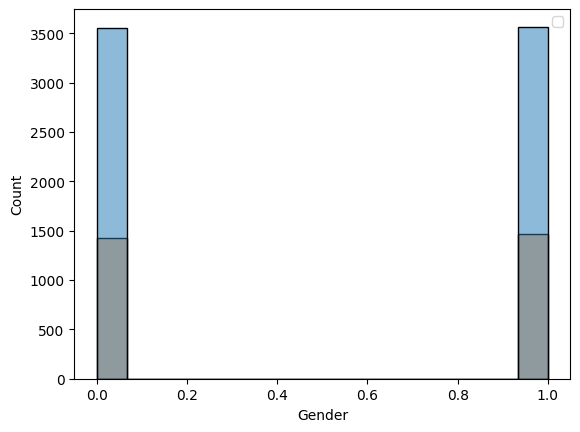

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


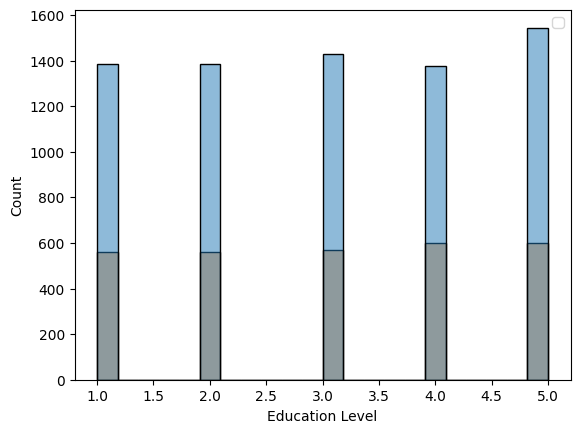

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


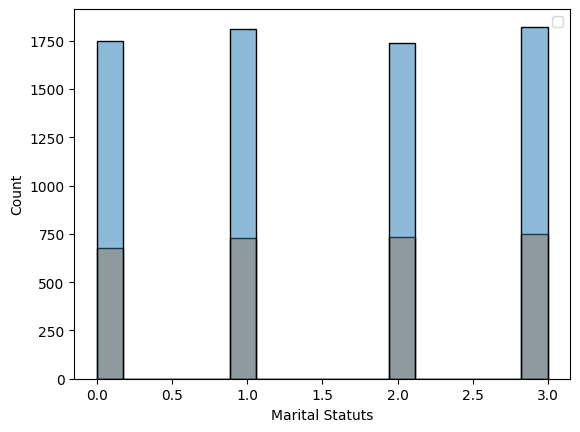

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


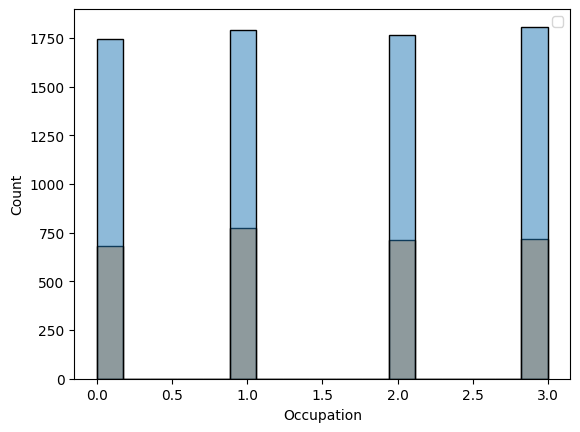

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


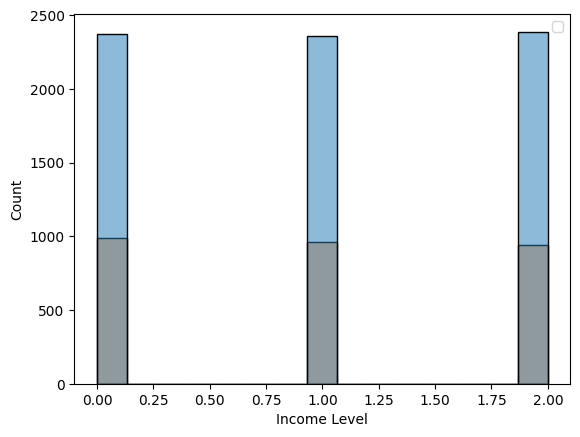

/var/tmp/ipykernel_88702/37708152.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


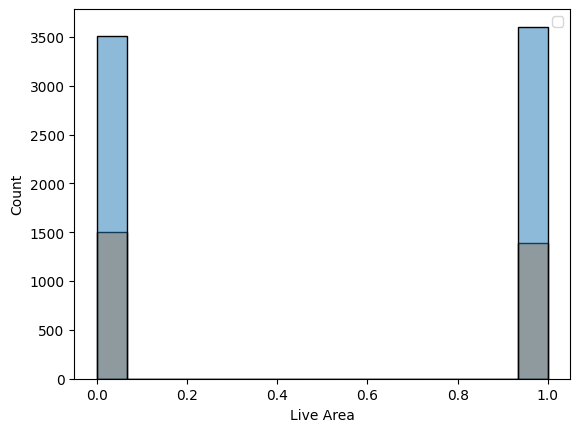

KeyError: 'Diagnosis'

In [8]:
for col in df.columns:
    sns.histplot(x=X[col], hue=y)
    plt.legend()
    plt.show()


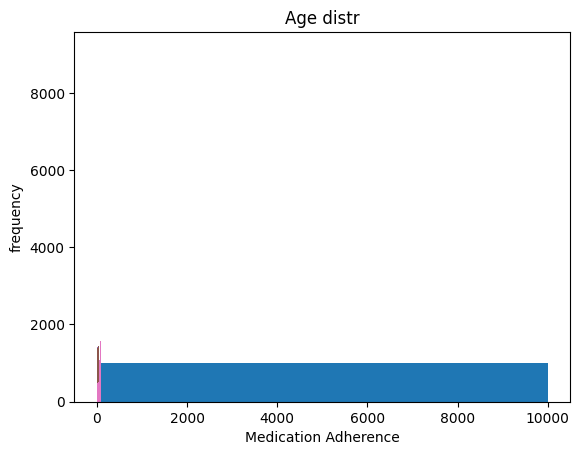

In [ ]:
for col in df.columns:
    plt.hist(df[col])

    plt.xlabel(f"{col}")
    plt.ylabel("frequency")
    plt.title("Age distr")

Text(0.5, 1.0, 'Negative Symptom Score distr')

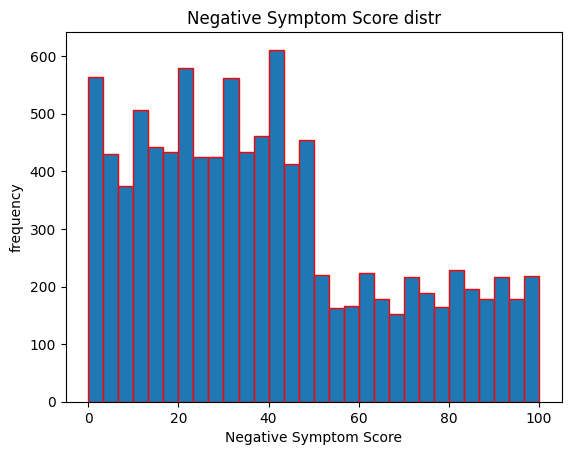

In [ ]:
plt.hist(df["Negative Symptom Score"], bins=30, edgecolor="red")

plt.xlabel("Negative Symptom Score")
plt.ylabel("frequency")
plt.title("Negative Symptom Score distr")

Text(0.5, 1.0, 'Live Area distr')

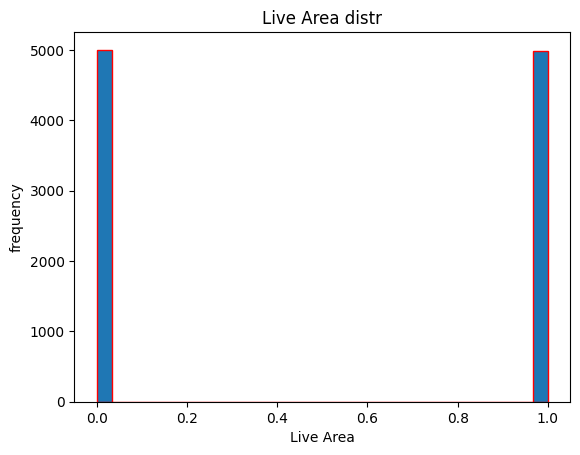

In [ ]:
plt.hist(df["Live Area"], bins=30, edgecolor="red")

plt.xlabel("Live Area")
plt.ylabel("frequency")
plt.title("Live Area distr")

Text(0.5, 1.0, 'Hospitalizations distr')

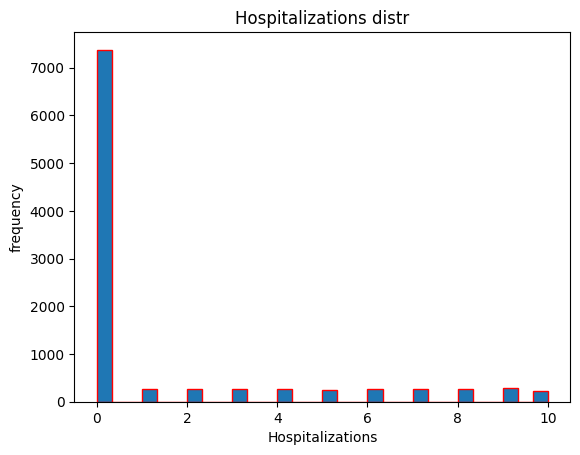

In [ ]:
plt.hist(df["Hospitalizations"], bins=30, edgecolor="red")

plt.xlabel("Hospitalizations")
plt.ylabel("frequency")
plt.title("Hospitalizations distr")

In [ ]:
df.describe()

,Patient ID,Age,Gender,Education Level,Martial Statuts,Occupation,Income level,Live Area,Diagnosis,Disease Duration,Hospitalizations,Family History,Substance use,Suicide Attempt,Positive Symptom Score,Negative Symptom Score,GAF Score,Social Support,Stress Factors,Medication Adherence
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


In [ ]:
y = df["Diagnosis"]
X = df.drop(columns=["Diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



cat_pipe = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
num_pipe = Pipeline([
    ("power", PowerTransformer())
])


preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


pipe_xgb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBClassifier(eval_metric='logloss', random_state=42))
])


pipe_xgb.fit(X_train, y_train)
test_accuracy = pipe_xgb.score(X_test, y_test)
print("XGBoost TEST accuracy:", test_accuracy)

scores_xgb = cross_val_score(pipe_xgb, X_train, y_train, cv=5, scoring='accuracy')

print("XGBoost CV-Accuracy: ", scores_xgb.mean())

XGBoost CV-Accuracy:  1.0
XGBoost TEST accuracy: 1.0


In [ ]:
pipe_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])


pipe_rf.fit(X_train, y_train)
test_accuracy = pipe_rf.score(X_test, y_test)
print("RandomForest TEST accuracy:", test_accuracy)

scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy')

print("Random Forest CV-Accuracy:", scores_rf.mean())

Random Forest CV-Accuracy: 1.0
RandomForest TEST accuracy: 1.0


In [ ]:
pipe_dt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

scores_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree CV-Accuracy:", scores_dt.mean())


Decision Tree CV-Accuracy: 1.0


In [ ]:
pipe_dt.fit(X_train, y_train)
test_accuracy = pipe_dt.score(X_test, y_test)
print("DescisionTree TEST accuracy:", test_accuracy)

RandomForest TEST accuracy: 1.0


In [ ]:
def create_model(trial):
    # Hyperparameter search space for XGBClassifier
    param_grid = {
        "model__n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "model__max_depth": trial.suggest_int("max_depth", 3, 10),
        "model__learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "model__subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "model__colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "model__gamma": trial.suggest_float("gamma", 0.0, 1.0)
    }
    
    # Create the pipeline with the preprocessor and model
    pipe_xgb = Pipeline([
        ("preprocessing", preprocessor),
        ("model", XGBClassifier(eval_metric='logloss', random_state=42))
    ])
    
    # Apply the hyperparameter search to the model
    pipe_xgb.set_params(**param_grid)
    
    return pipe_xgb


In [ ]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Create the model with hyperparameters suggested by Optuna
    model = create_model(trial)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    f1 = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Output the best parameters and the best score
print("Best parameters found: ", study.best_params)
print("Best accuracy score: ", study.best_value)

[I 2025-03-06 21:10:10,152] A new study created in memory with name: no-name-c0939fe0-f1cf-4557-beaa-ef515276d838
[W 2025-03-06 21:10:10,154] Trial 0 failed with parameters: {} because of the following error: NameError("name 'create_model' is not defined").
Traceback (most recent call last):
  File "/opt/conda/envs/ml/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/tmp/ipykernel_88702/506016173.py", line 4, in objective
    model = create_model(trial)
            ^^^^^^^^^^^^
NameError: name 'create_model' is not defined
[W 2025-03-06 21:10:10,162] Trial 0 failed with value None.


NameError: name 'create_model' is not defined

In [ ]:
def plots(df, col, pt):
    plt.figure(figsize=(8,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title('Before ' + str(pt).split('(')[0])

    plt.subplot(122)
    p1 = pt.fit_transform(df[[col]]).values.flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(pt).split('(')[0])


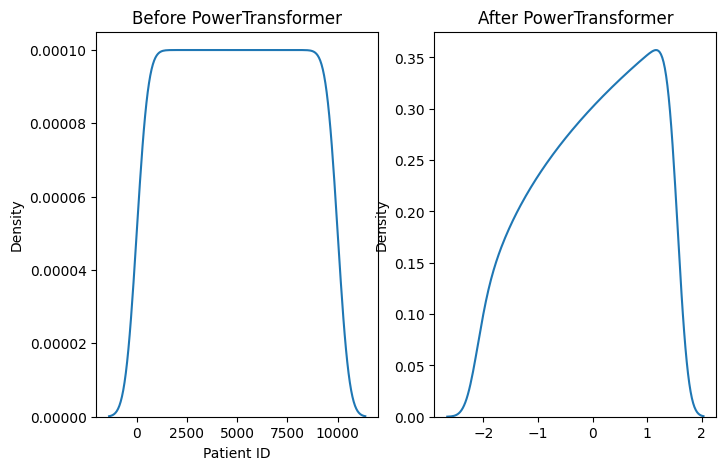

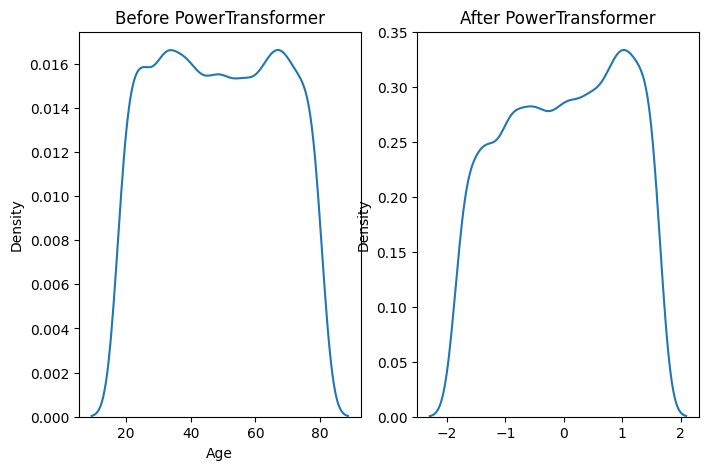

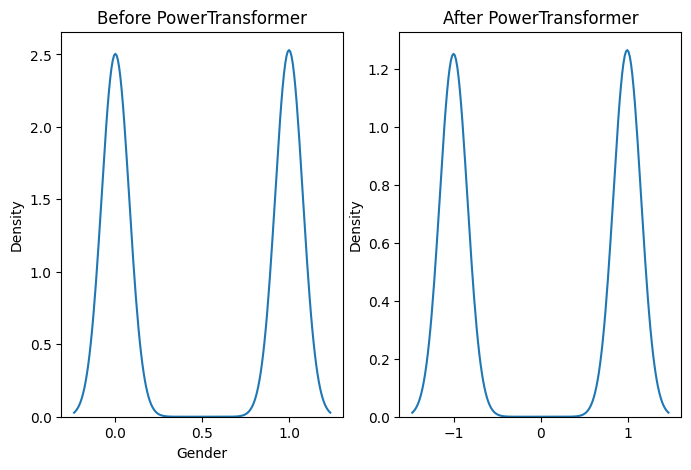

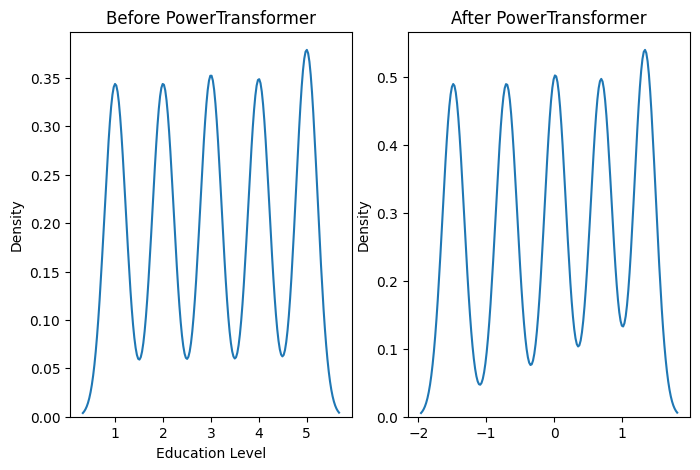

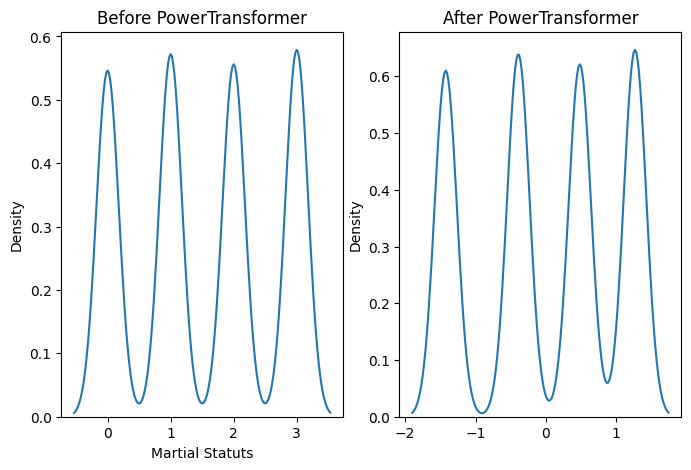

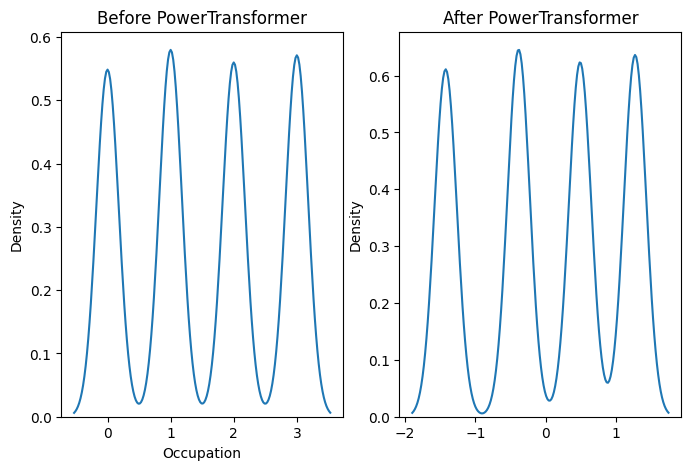

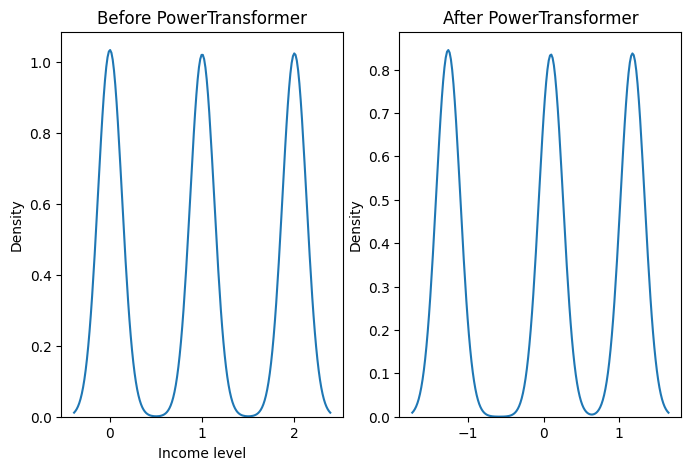

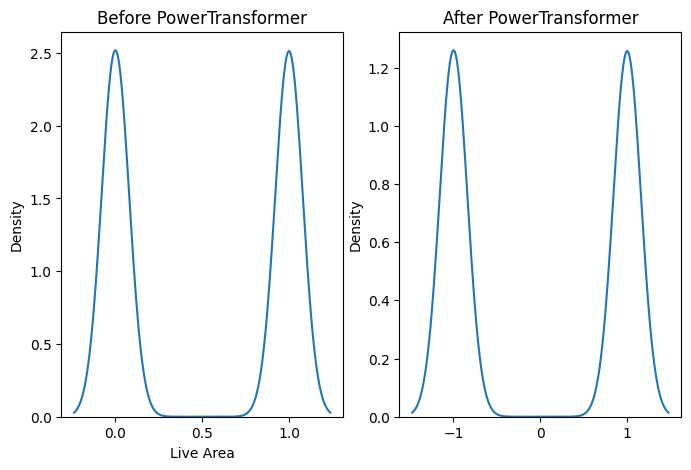

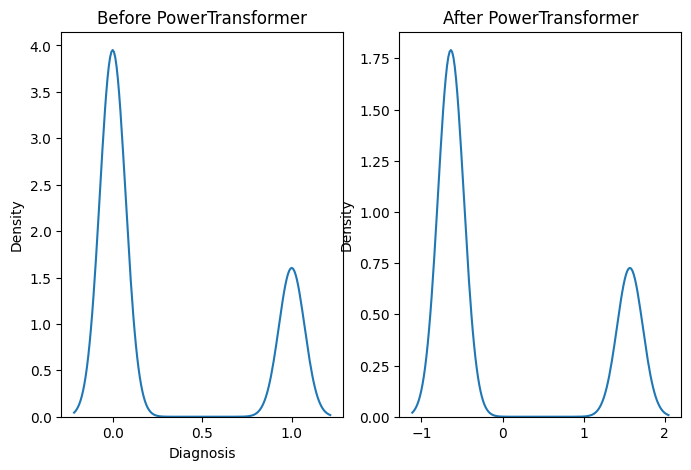

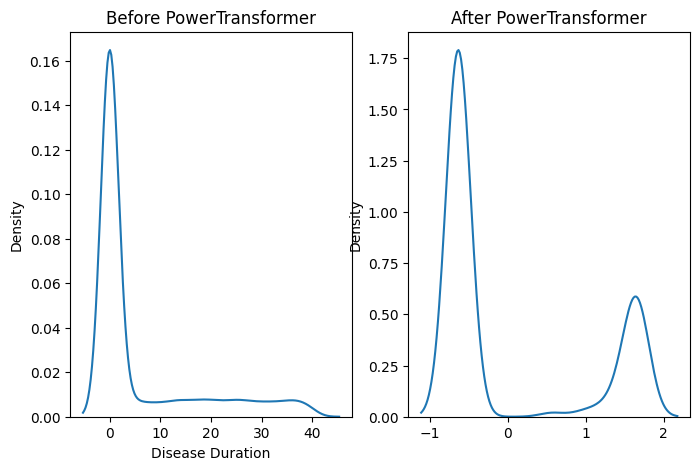

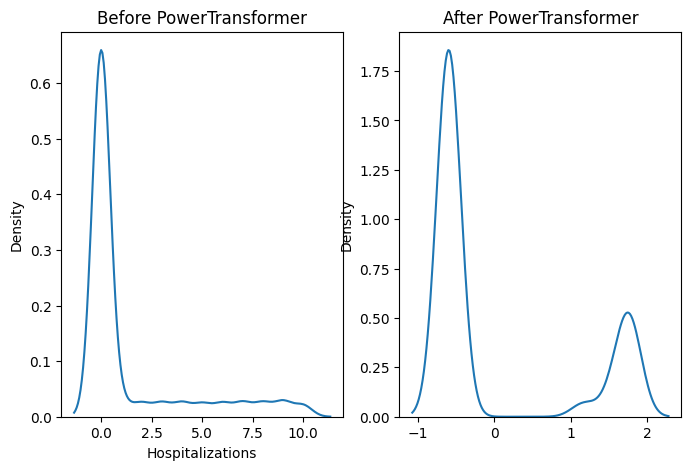

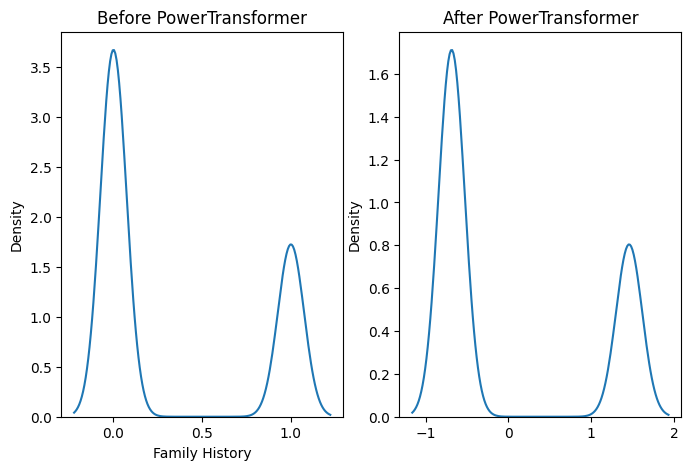

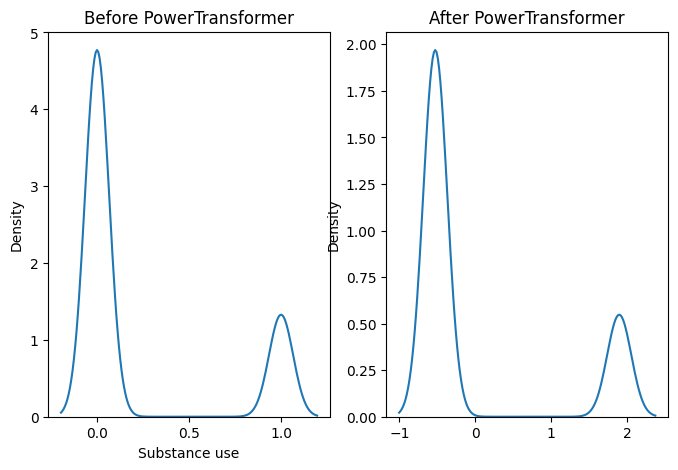

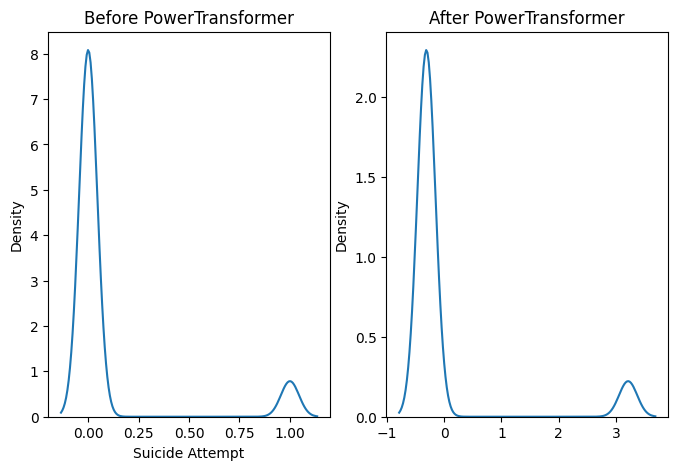

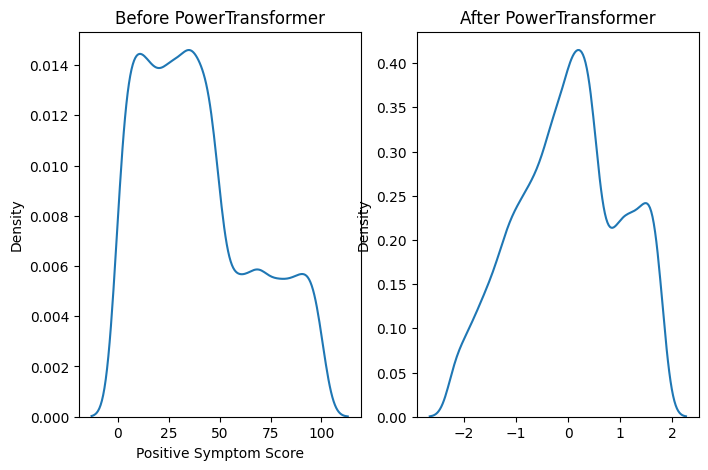

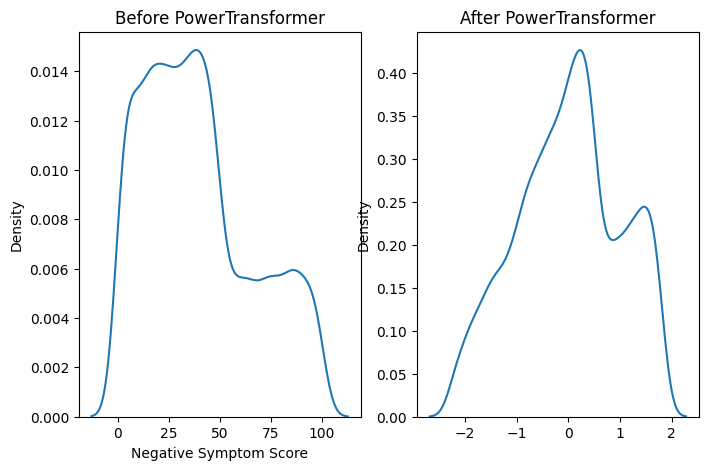

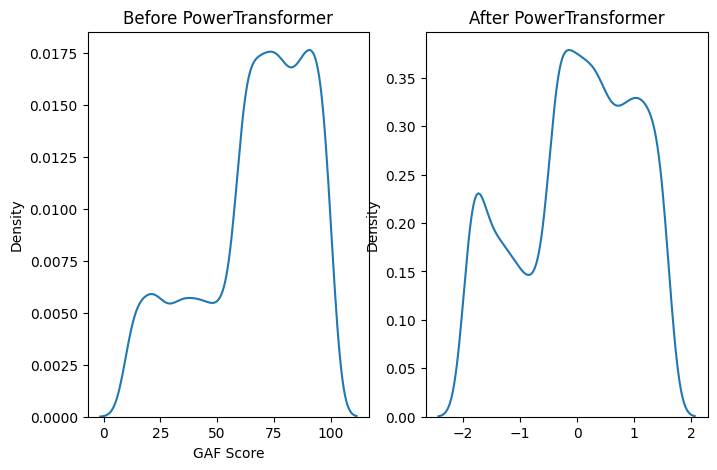

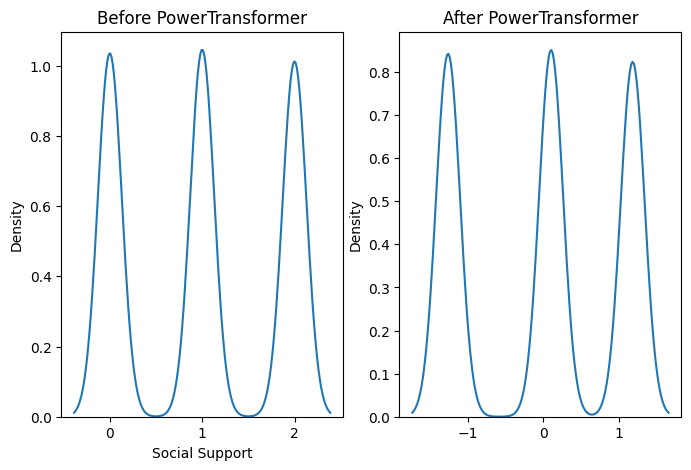

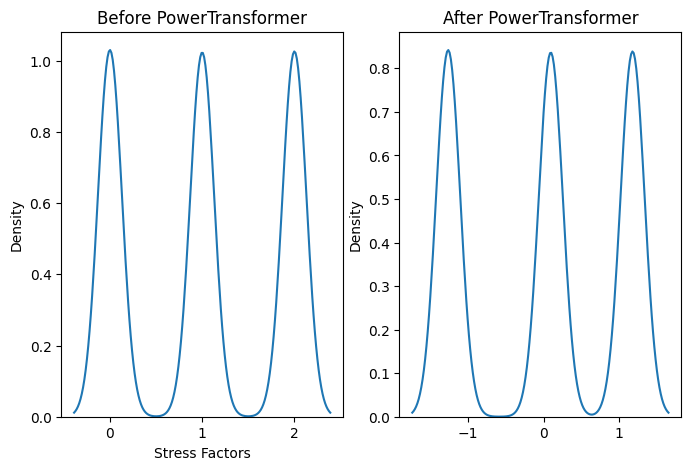

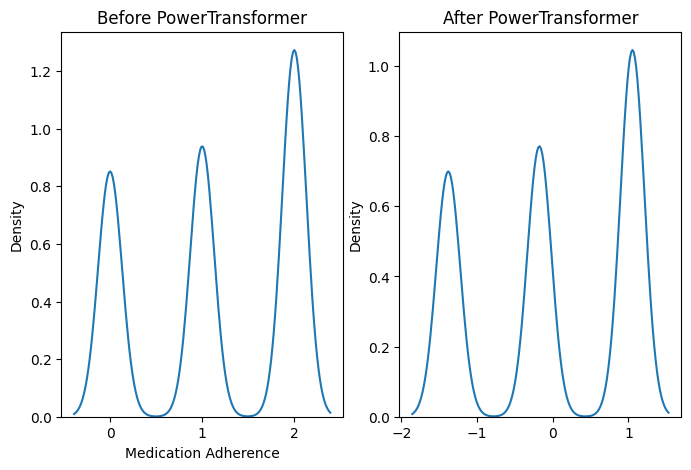

In [ ]:
for col in df.columns:
    plots(df, col, PowerTransformer(method='yeo-johnson'))

ValueError: The Box-Cox transformation can only be applied to strictly positive data

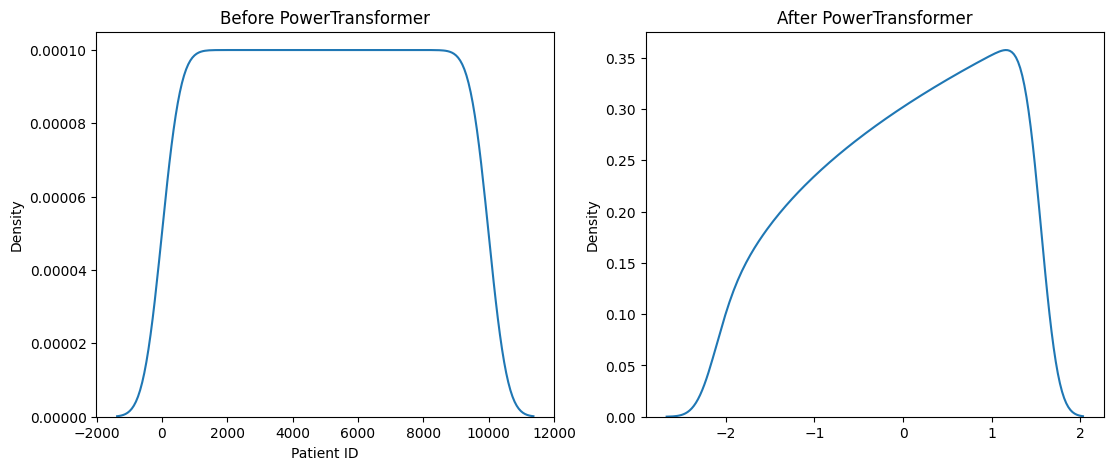

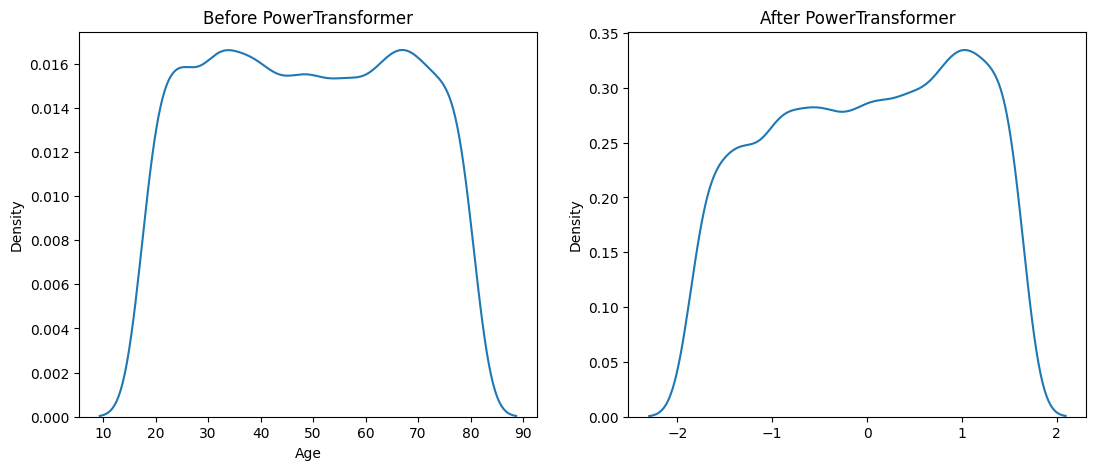

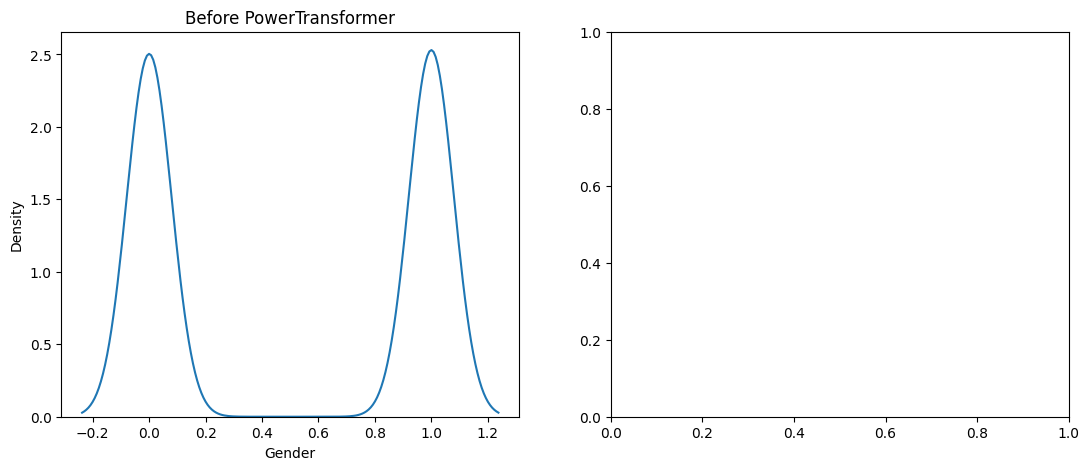